In [1]:
#加载包
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  KFold,RandomizedSearchCV
from sklearn.metrics import roc_auc_score,roc_auc_score, accuracy_score, f1_score, brier_score_loss,confusion_matrix
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [32]:
# 读取数据
data = pd.read_csv("（中文）内部训练集9变量扩增.csv",index_col=False,header=0)
data=data.drop(data.columns[0], axis=1)
X = data.drop("outcome", axis=1)
y = data["outcome"]

In [3]:
np.random.seed(42)
# 设置随机森林的超参数空间
RF_param_dist = {
   'n_estimators': range(100, 501, 50),
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(2, 11),
    'criterion': ['gini', 'entropy'],
    'max_features': np.linspace(0, 1, 20),
}

# 定义随机森林模型
model = RandomForestClassifier()

# 定义交叉验证策略
cv = KFold(n_splits=5, shuffle=False)

# 定义随机搜索对象
random_search = RandomizedSearchCV(
    model,
    param_distributions=RF_param_dist,
    n_iter=50,
    scoring="roc_auc",
    n_jobs=-1,
    cv=cv,
    random_state=42
)

In [4]:
np.random.seed(42)
# 在训练集上执行随机搜索
random_search.fit(X, y)

# 输出最佳模型超参数
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

# 在全数据集上训练最佳模型并计算AUC值
RF = RandomForestClassifier(**best_params)
RF.fit(X, y)
y_pred = RF.predict_proba(X)[:, 1]  # 预测概率值
#评价指标
y_pred = RF.predict(X)
y_pro = RF.predict_proba(X)[:, 1]
roc_auc = roc_auc_score(y, y_pro)
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
brier_score = brier_score_loss(y, y_pred)
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("roc_auc:", roc_auc, "\naccuracy:", accuracy, "\nsensitivity:", sensitivity, "\nspecificity:", specificity,"\nf1:", f1, "\nbrier_score:", brier_score)


20 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\stay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\stay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\stay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\stay\AppData\Local\Programs\Python\Python39\lib\site-

Best hyperparameters:  {'n_estimators': 500, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 0.3684210526315789, 'max_depth': 9, 'criterion': 'gini'}


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

roc_auc: 0.9622808724587806 
accuracy: 0.8904292188749666 
sensitivity: 0.9660087719298246 
specificity: 0.8188894654903995 
f1: 0.8955527318932656 
brier_score: 0.10957078112503332


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

In [31]:
# 读取数据
data = pd.read_csv("（中文）内部测试集.csv")
data_1=data.drop(data.columns[0], axis=1)
X_1 = data_1.drop("outcome", axis=1)
y_1 = data_1["outcome"]

In [6]:
# 获取df1的列顺序
column_order = X.columns

In [7]:
# 使用reindex函数重新排序df2的列
X_1 = X_1.reindex(columns=column_order)

In [8]:
# 预测并评估模型性能
models = {
          'RF': RF
         }

results = {}

for model_name, model in models.items():
    y_pred = model.predict(X_1)
    y_pro = model.predict_proba(X_1)[:, 1]
    roc_auc = roc_auc_score(y_1, y_pro)
    accuracy = accuracy_score(y_1, y_pred)
    f1 = f1_score(y_1, y_pred)
    brier_score = brier_score_loss(y_1, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_1, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    results[model_name] = {'AUC': roc_auc,
                           'Accuracy': accuracy,
                           'Sensitivity': sensitivity,
                           'Specificity': specificity,
                           'F1 Score': f1,
                           'Brier Score': brier_score}

# 将结果整理成表格
df_results = pd.DataFrame(results)
print(df_results)

                   RF
AUC          0.907561
Accuracy     0.806067
Brier Score  0.193933
F1 Score     0.495775
Sensitivity  0.862745
Specificity  0.799026


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

In [9]:
outputdf = pd.DataFrame(y_pred,y_pro)

In [10]:
outputdf.to_excel(r'outputdf0116.xlsx')

In [11]:
outputdf=X.iloc[1]

In [12]:
type(outputdf)

pandas.core.series.Series

In [13]:
outputdf = pd.DataFrame([outputdf], columns= X.columns)

In [14]:
outputdf

,年龄,红细胞压积,收缩压,他汀类药物,尿素氮,白细胞计数,华法林,机械通气,碳酸氢盐
1,63,28,115,1,16,12,0,1,23


In [15]:
import pickle

In [17]:
#保存模型
with open("RF1.pickle","wb")as file:
    pickle.dump(RF,file)

In [5]:
#这是针对LGBM的
explainer = shap.Explainer(LGBM,X)
shap_values = explainer(X)

100%|===================| 3744/3751 [00:35<00:00]        

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


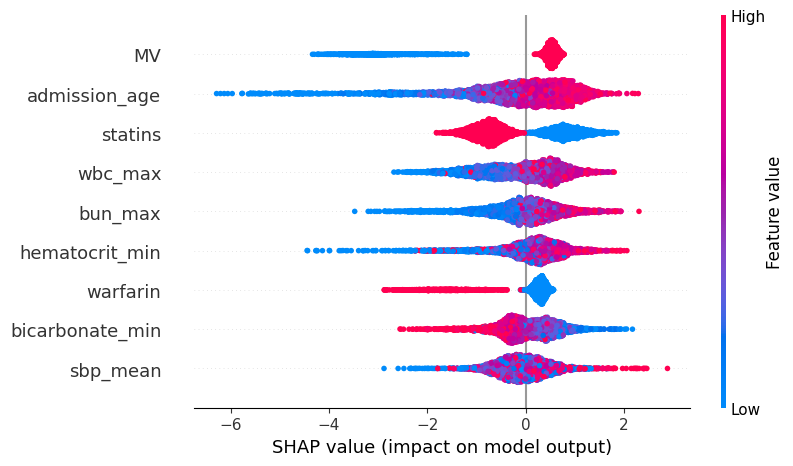

In [6]:
shap.plots.beeswarm(shap_values, show=False)  # 设置show=False以便后续调整布局

In [15]:
import matplotlib.pyplot as plt

In [16]:
shap.initjs()

In [17]:
shap.force_plot(explainer.expected_value, shap_values[0].values,X.iloc[0,:],link='logit')

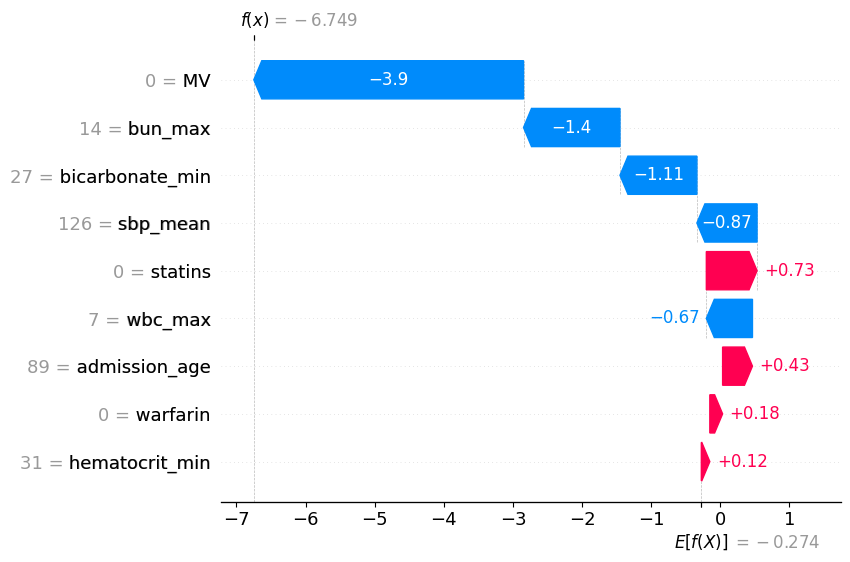

In [7]:
shap.plots.waterfall(shap_values[0])

In [53]:
shap_values[0]

.values =
array([[-0.02616058,  0.02616058],
       [ 0.00037609, -0.00037609],
       [ 0.03997457, -0.03997457],
       [-0.04854319,  0.04854319],
       [ 0.08780704, -0.08780703],
       [ 0.09596518, -0.09596517],
       [-0.01494044,  0.01494044],
       [ 0.34778921, -0.3477892 ],
       [ 0.0525156 , -0.0525156 ]])

.base_values =
array([0.44152396, 0.55847604])

.data =
array([ 89,  31, 126,   0,  14,   7,   0,   0,  27], dtype=int64)

In [59]:
explainer   = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X)

In [62]:
shap.force_plot(explainer.expected_value[1], shap_values[0][0,:],X.iloc[0,:],link='logit')

In [26]:
#以下作为练习绘制各变量SHAP图用

In [20]:
#设置字体
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False

In [18]:
explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X)

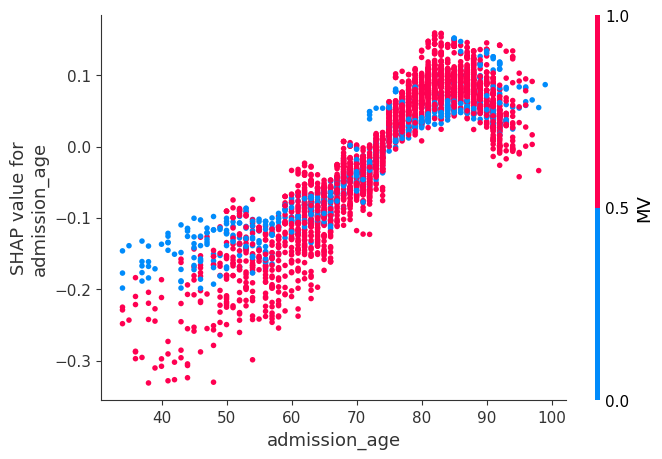

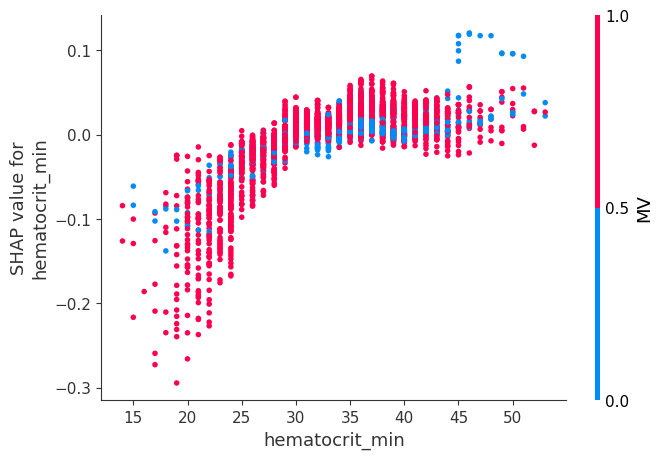

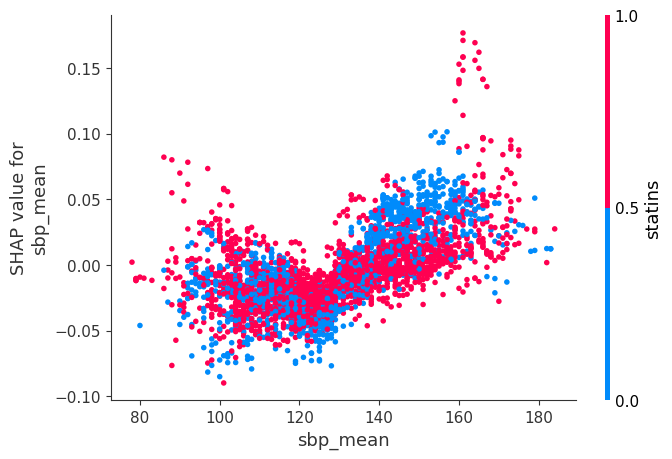

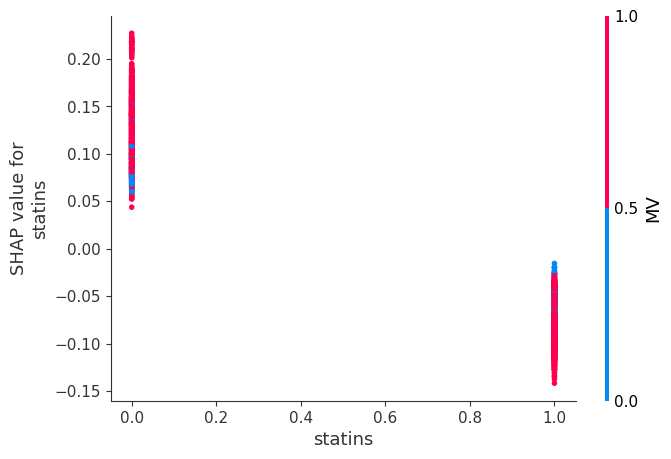

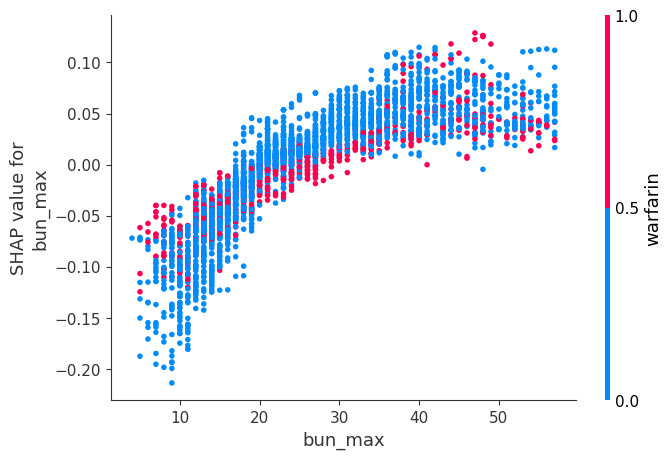

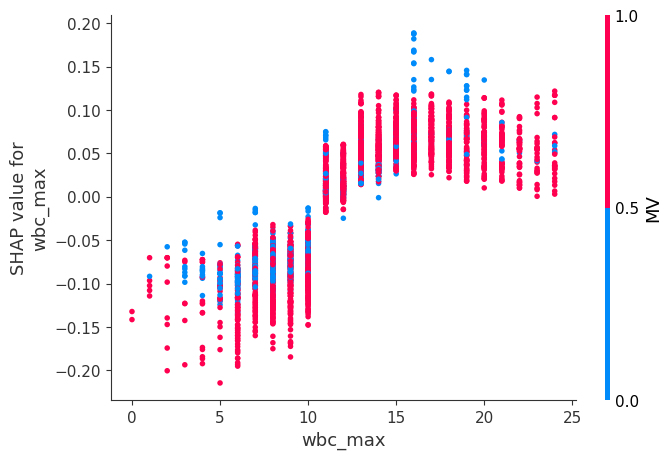

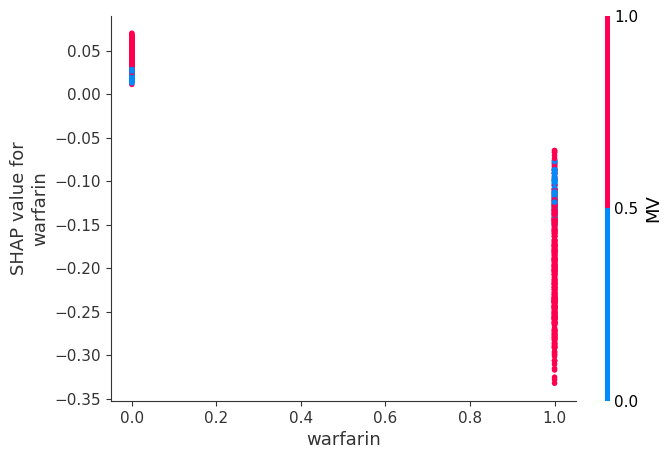

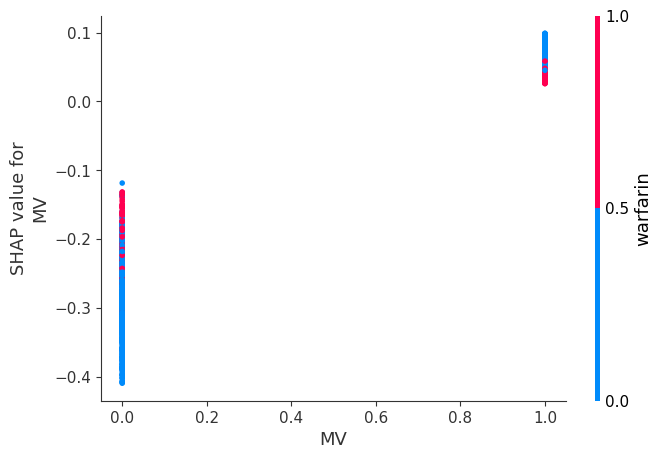

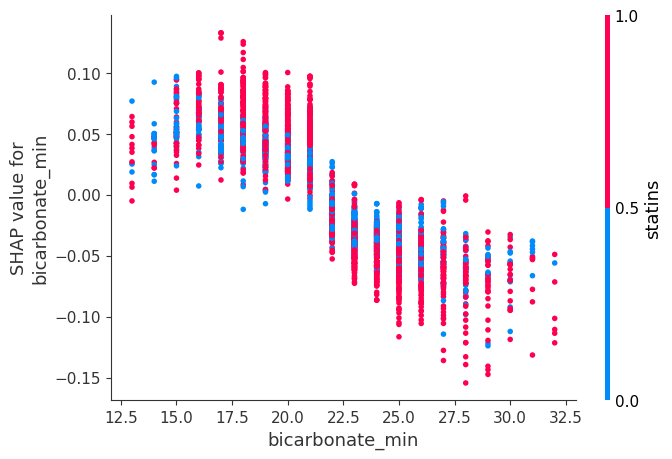

In [17]:
#这是带交互作用的
for name in X.columns:
    shap.dependence_plot(name, shap_values[1], X)

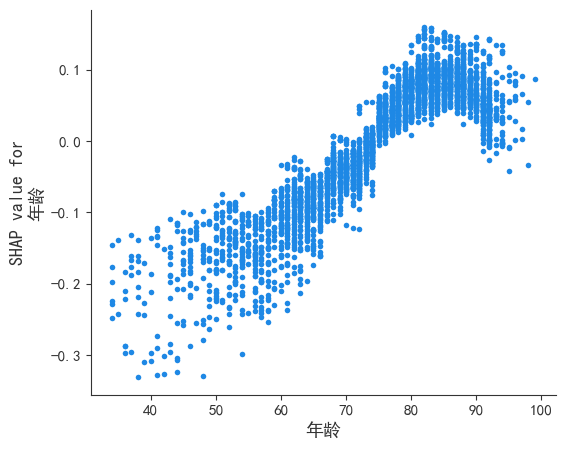

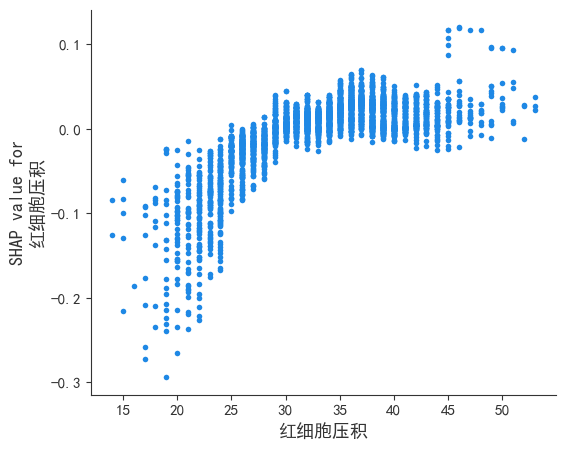

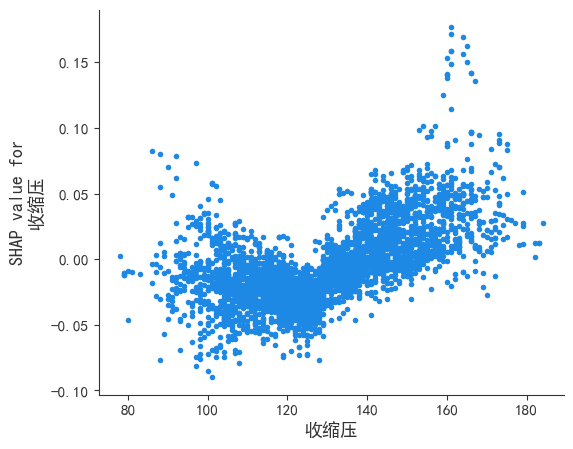

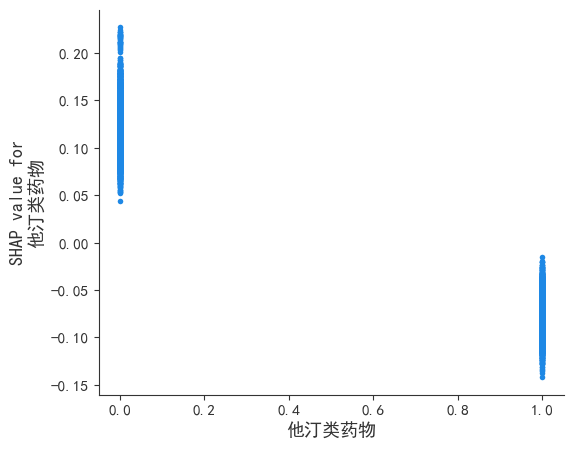

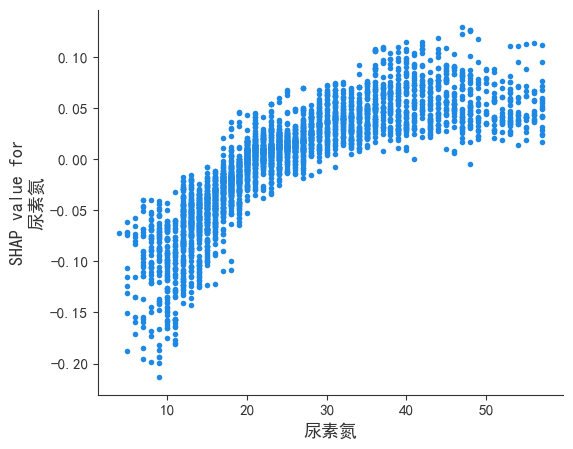

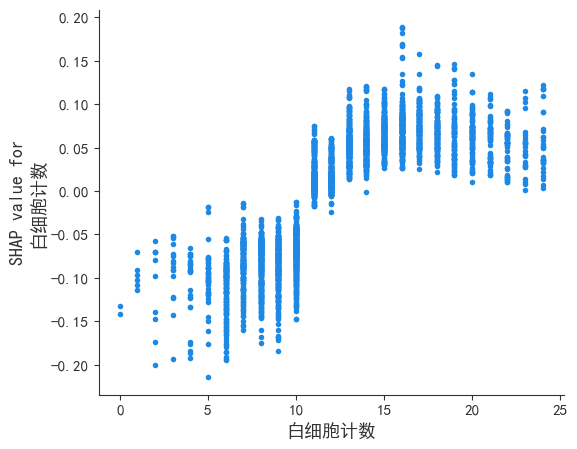

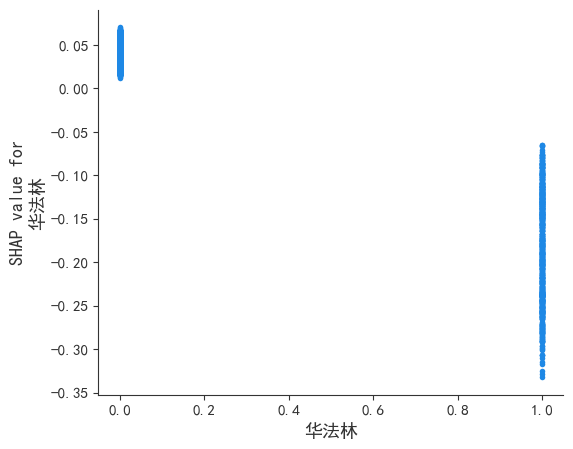

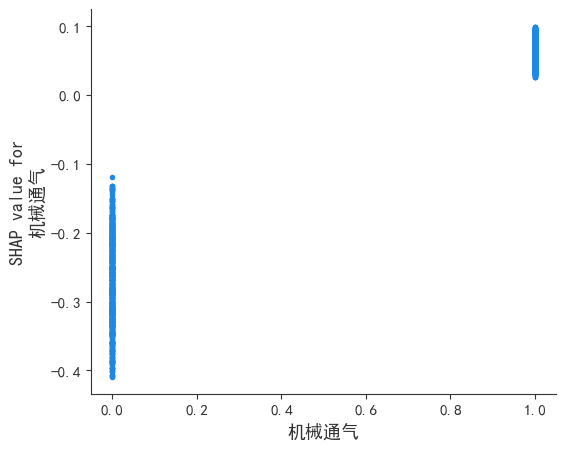

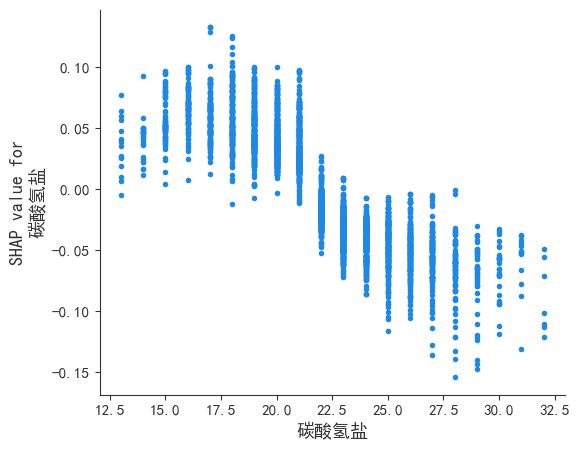

In [21]:
#这是不带交互作用的
for name in X.columns:
    shap.dependence_plot(name, shap_values[1], X,interaction_index=None)

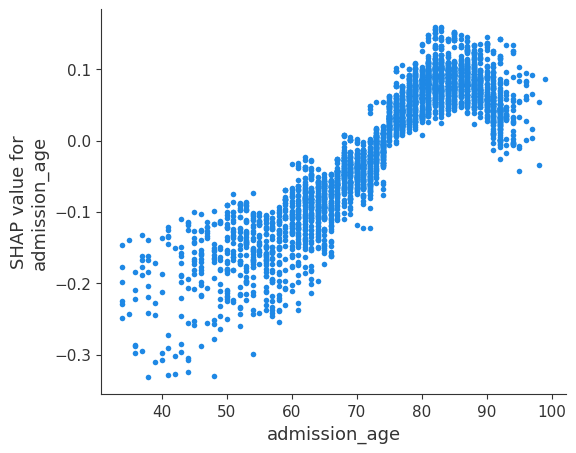

In [19]:
#单独生成一个
shap.dependence_plot(0, shap_values[1], X,interaction_index=None)

In [20]:
#这是针对LGBM的
explainer = shap.Explainer(RF,X)
shap_values = explainer(X)

100%|===================| 7491/7502 [04:14<00:00]        

In [35]:
shap_values1 = explainer.shap_values(X)

100%|===================| 7479/7502 [04:15<00:00]        

In [22]:
shap_values

[array([[-0.03841642,  0.00701104,  0.04433903, ..., -0.01750371,
          0.33128342,  0.05139074],
        [ 0.11180178,  0.05779242,  0.0319859 , ..., -0.04112418,
         -0.05623954,  0.05665117],
        [ 0.11775516, -0.0050584 , -0.02395058, ...,  0.23491272,
         -0.05184883,  0.03841494],
        ...,
        [ 0.06111814, -0.0347521 ,  0.00698327, ..., -0.05287543,
         -0.07931282, -0.03028276],
        [ 0.02871804, -0.03895908, -0.00836494, ..., -0.05193683,
         -0.08305612, -0.04446984],
        [-0.04807972, -0.01258468,  0.01339516, ..., -0.06272908,
         -0.07052937, -0.0863782 ]]),
 array([[ 0.03841642, -0.00701104, -0.04433903, ...,  0.01750371,
         -0.33128342, -0.05139074],
        [-0.11180178, -0.05779242, -0.0319859 , ...,  0.04112418,
          0.05623954, -0.05665117],
        [-0.11775516,  0.0050584 ,  0.02395058, ..., -0.23491272,
          0.05184883, -0.03841494],
        ...,
        [-0.06111814,  0.0347521 , -0.00698327, ...,  

In [23]:
shap_values

[array([[-0.03841642,  0.00701104,  0.04433903, ..., -0.01750371,
          0.33128342,  0.05139074],
        [ 0.11180178,  0.05779242,  0.0319859 , ..., -0.04112418,
         -0.05623954,  0.05665117],
        [ 0.11775516, -0.0050584 , -0.02395058, ...,  0.23491272,
         -0.05184883,  0.03841494],
        ...,
        [ 0.06111814, -0.0347521 ,  0.00698327, ..., -0.05287543,
         -0.07931282, -0.03028276],
        [ 0.02871804, -0.03895908, -0.00836494, ..., -0.05193683,
         -0.08305612, -0.04446984],
        [-0.04807972, -0.01258468,  0.01339516, ..., -0.06272908,
         -0.07052937, -0.0863782 ]]),
 array([[ 0.03841642, -0.00701104, -0.04433903, ...,  0.01750371,
         -0.33128342, -0.05139074],
        [-0.11180178, -0.05779242, -0.0319859 , ...,  0.04112418,
          0.05623954, -0.05665117],
        [-0.11775516,  0.0050584 ,  0.02395058, ..., -0.23491272,
          0.05184883, -0.03841494],
        ...,
        [-0.06111814,  0.0347521 , -0.00698327, ...,  

In [24]:
shap_values1[1][1]

NameError: name 'shap_values1' is not defined

In [34]:
shap_values.values

array([[[-0.02616058,  0.02616058],
        [ 0.00037609, -0.00037609],
        [ 0.03997457, -0.03997457],
        ...,
        [-0.01494044,  0.01494044],
        [ 0.34778921, -0.3477892 ],
        [ 0.0525156 , -0.0525156 ]],

       [[ 0.12760292, -0.12760292],
        [ 0.04792454, -0.04792454],
        [ 0.0310075 , -0.0310075 ],
        ...,
        [-0.03446585,  0.03446584],
        [-0.03526902,  0.03526902],
        [ 0.05233494, -0.05233493]],

       [[ 0.14693087, -0.14693087],
        [-0.01606864,  0.01606864],
        [-0.02371021,  0.02371021],
        ...,
        [ 0.22788439, -0.22788438],
        [-0.03700199,  0.03700199],
        [ 0.03476683, -0.03476683]],

       ...,

       [[ 0.07335719, -0.07335718],
        [-0.04926377,  0.04926377],
        [ 0.00448003, -0.00448003],
        ...,
        [-0.05143559,  0.05143559],
        [-0.05956153,  0.05956152],
        [-0.02437708,  0.02437708]],

       [[ 0.04606936, -0.04606936],
        [-0.05552482,  0.05

In [30]:
shap_values.values[1][:,0]

array([ 0.12760292,  0.04792454,  0.0310075 ,  0.13934874,  0.05232609,
       -0.01066585, -0.03446585, -0.03526902,  0.05233494])

In [27]:
data

,Unnamed: 0,gender,smoking_history,drinking_history,COPD,dementia,CHF,malignancy,AF,liver_disease,...,potassium_min,inr_max,pt_max,ptt_max,weight,apsiii,oasis,sofa,gcs,outcome
0,1,1,1,0,0,0,0,0,0,0,...,4.1,1.2,15.5,29.2,74.0,26,10,1,15,0
1,3,1,0,0,1,0,1,0,0,0,...,4.0,1.7,19.0,48.6,82.2,49,27,5,15,0
2,9,0,0,0,0,1,1,0,0,0,...,3.6,1.1,12.9,25.8,60.9,43,20,5,8,1
3,12,0,0,0,0,0,0,1,0,0,...,4.1,1.5,16.4,24.0,74.0,37,21,3,15,1
4,14,0,0,0,0,0,0,0,0,0,...,3.5,2.0,15.6,48.2,68.6,59,29,8,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,3060,1,0,0,0,0,1,0,1,0,...,3.5,1.5,16.1,53.2,105.0,39,14,2,15,0
919,3064,1,1,0,1,0,1,0,0,0,...,4.2,1.4,15.8,45.8,55.3,50,30,5,10,1
920,3069,0,0,0,0,0,0,0,1,0,...,4.6,1.5,15.6,32.3,62.0,30,26,10,15,0
921,3071,0,0,0,0,0,1,0,1,1,...,4.5,1.4,14.3,49.8,94.1,64,14,8,15,0


In [33]:
shapvaluedf = pd.DataFrame(shap_values[1], columns= data.drop(['outcome'],axis=1).columns)

In [34]:
shapvaluedf

,年龄,红细胞压积,收缩压,他汀类药物,尿素氮,白细胞计数,华法林,机械通气,碳酸氢盐
0,0.038416,-0.007011,-0.044339,0.076914,-0.079050,-0.082400,0.017504,-0.331283,-0.051391
1,-0.111802,-0.057792,-0.031986,-0.108700,-0.045361,0.016928,0.041124,0.056240,-0.056651
2,-0.117755,0.005058,0.023951,0.140630,-0.042723,0.054387,-0.234913,0.051849,-0.038415
3,0.072749,0.015520,0.010873,-0.097568,0.032109,-0.091647,0.056785,0.077058,-0.094626
4,0.065883,-0.001859,-0.052872,0.120876,0.000237,-0.214377,-0.225458,0.048833,-0.031751
...,...,...,...,...,...,...,...,...,...
3746,-0.041809,0.038606,0.008713,0.101808,-0.038286,0.083290,0.053190,0.084577,0.041966
3747,-0.038217,0.033037,-0.036153,0.073894,-0.016540,0.071373,0.051799,0.069738,0.049392
3748,-0.061118,0.034752,-0.006983,0.106634,-0.041608,0.091161,0.052875,0.079313,0.030283
3749,-0.028718,0.038959,0.008365,0.090767,-0.042391,0.080527,0.051937,0.083056,0.044470


In [35]:
shapdatadf = pd.DataFrame(shap_values.data, columns= data.drop(['outcome'],axis=1).columns)

AttributeError: 'list' object has no attribute 'data'

In [48]:
shapdatadf

,admission_age,hematocrit_min,sbp_mean,statins,bun_max,wbc_max,warfarin,MV,bicarbonate_min
0,89,31,126,0,14,7,0,0,27
1,63,28,115,1,16,12,0,1,23
2,70,30,139,0,13,15,1,1,23
3,86,34,149,1,33,9,0,1,30
4,87,40,128,0,27,5,1,1,24
...,...,...,...,...,...,...,...,...,...
3746,67,39,130,0,14,14,0,1,20
3747,71,36,127,0,18,15,0,1,18
3748,64,39,129,0,13,15,0,1,21
3749,68,39,130,0,14,14,0,1,19


In [49]:
shapdatadf.to_excel(r'shapdatadf.xlsx')
shapvaluedf.to_excel(r'shapvaluedf.xlsx')